<a href="https://colab.research.google.com/github/tripathiarpan20/QnA-Youtube-Playlist/blob/main/QnA_Youtube_Playlist_Captions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Captions Dataset

Steps:
* Follow the Step 1 of [the official guide](https://developers.google.com/youtube/v3/quickstart/python?authuser=1) to set-up Youtube Data API

* Go to [Google Cloud API console](https://console.cloud.google.com/apis/dashboard?authuser=1), enable `Youtube Data API v3` and generate an API key

* Overwrite the API_KEY variable below with your Google account's API 

In [ ]:
#@markdown Paste API key in the field below and run this cell
API_KEY = "" #@param {type:"string"}

References:  
https://developers.google.com/youtube/v3  
https://github.com/jdepoix/youtube-transcript-api  
https://github.com/danielcliu/youtube-channel-transcript-api

## Installing dependencies

In [ ]:
!pip install youtube_channel_transcript_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from youtube_channel_transcript_api import *
import os
from pprint import pprint

## Loading captions from playlist

The Playlist ID can be retrieved by from any Youtube playlist by copying the part after `&list=` and before the next `&`, as highlighted in the sample below:

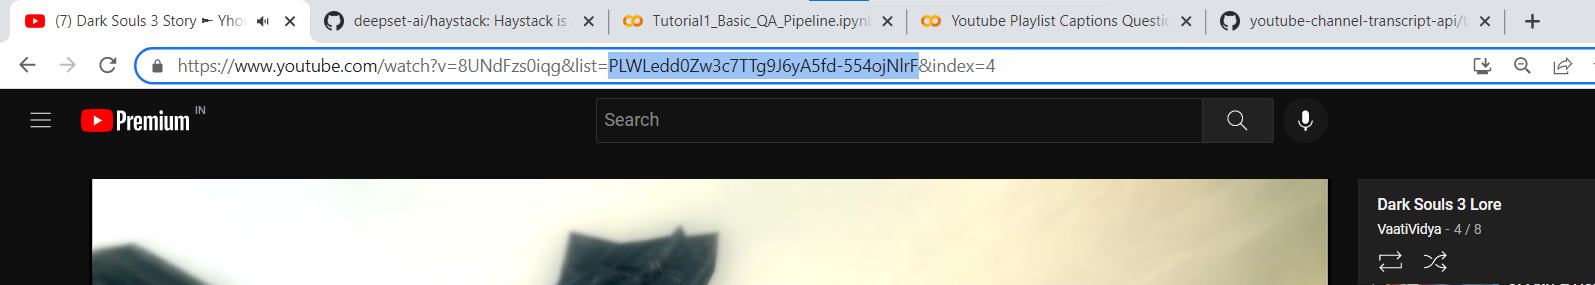

(The sample above refers to [Dark Souls 3 lore](https://www.youtube.com/watch?v=fs5fNUKn08c&list=PLWLedd0Zw3c7TTg9J6yA5fd-554ojNlrF) playlist by Vaatividya, one of my favorites)


In [ ]:
#@markdown Enter the playlist ID from which videos are to be fetched

PLAYLIST_ID = "PLwxNMb28XmpeypJMHfNbJ4RAFkRtmAN3P" #@param {type:"string"}
channel_getter = YoutubePlaylistTranscripts("Random Name which does not matter",PLAYLIST_ID, API_KEY)
print(f'type(channel_getter) = {type(channel_getter)}')
print(f'Playlist video,id pairs:\n {channel_getter.video}')

type(channel_getter) = <class 'youtube_channel_transcript_api.transcripts.YoutubePlaylistTranscripts'>
Playlist video,id pairs:
 [['PLATO ON: The Allegory of the Cave', 'SWlUKJIMge4'], ['PLATO ON: The Forms', 'MgotDFs6cdE'], ['PHILOSOPHY - Aristotle', 'csIW4W_DYX4'], ['PHILOSOPHY - Epicurus', 'Kg_47J6sy3A'], ['PHILOSOPHY - The Stoics', 'yu7n0XzqtfA'], ['Boethius’s Consolation of Philosophy', 'pMUP48stXDc'], ['PHILOSOPHY - Augustine', 'hBAxUBeVfsk'], ['PHILOSOPHY - Thomas Aquinas', 'GJvoFf2wCBU'], ['PHILOSOPHY - Montaigne', 'WLAtXWaz76o'], ['PHILOSOPHY - La Rochefoucauld', '8CEvFA7laik'], ['PHILOSOPHY - Blaise Pascal', '3nb4nYqNXyM'], ['PHILOSOPHY - René Descartes', 'CAjWUrwvxs4'], ['PHILOSOPHY - Baruch Spinoza', 'pVEeXjPiw54'], ['PHILOSOPHY - David Hume', 'HS52H_CqZLE'], ['PHILOSOPHY: Immanuel Kant', 'nsgAsw4XGvU'], ['Burke on: The Sublime', 'BvzG_p_sdOQ'], ['PHILOSOPHY - Soren Kierkegaard', 'D9JCwkx558o'], ['PHILOSOPHY - Schopenhauer', 'q0zmfNx7OM4'], ['PHILOSOPHY - Hegel', 'H5JGE3lhu

In [ ]:
#@markdown Run this cell to fetch captions from Youtube playlist
videos_data, videos_errored = channel_getter.get_transcripts(languages=['en'])

#### Saving a backup

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [ ]:
#@markdown Run this cell to save a backup in the `/content/` folder
import pickle
with open(f'/content/{PLAYLIST_ID}_vids_data_processed.pkl', 'wb') as f:
    pickle.dump(videos_data, f)
with open(f'/content/{PLAYLIST_ID}_vids_data_errored.pkl', 'wb') as f:
    pickle.dump(videos_errored, f)

In [ ]:
#@markdown Run this cell to get a list of videos loaded from the playlist
print(f'Number of videos loaded from playlist: {len(videos_data)}')
print('List of loaded videos:')
print( {a:b['title'] for (a,b) in zip(videos_data.keys(), videos_data.values())})

Number of videos loaded from playlist: 30
List of loaded videos:
{'SWlUKJIMge4': 'PLATO ON: The Allegory of the Cave', 'MgotDFs6cdE': 'PLATO ON: The Forms', 'csIW4W_DYX4': 'PHILOSOPHY - Aristotle', 'Kg_47J6sy3A': 'PHILOSOPHY - Epicurus', 'yu7n0XzqtfA': 'PHILOSOPHY - The Stoics', 'hBAxUBeVfsk': 'PHILOSOPHY - Augustine', 'GJvoFf2wCBU': 'PHILOSOPHY - Thomas Aquinas', 'WLAtXWaz76o': 'PHILOSOPHY - Montaigne', '8CEvFA7laik': 'PHILOSOPHY - La Rochefoucauld', '3nb4nYqNXyM': 'PHILOSOPHY - Blaise Pascal', 'CAjWUrwvxs4': 'PHILOSOPHY - René Descartes', 'pVEeXjPiw54': 'PHILOSOPHY - Baruch Spinoza', 'HS52H_CqZLE': 'PHILOSOPHY - David Hume', 'nsgAsw4XGvU': 'PHILOSOPHY: Immanuel Kant', 'BvzG_p_sdOQ': 'Burke on: The Sublime', 'D9JCwkx558o': 'PHILOSOPHY - Soren Kierkegaard', 'q0zmfNx7OM4': 'PHILOSOPHY - Schopenhauer', 'H5JGE3lhuNo': 'PHILOSOPHY - Hegel', 'q54VyCpXDH8': 'Why Hegel knew there would be days like these', 'bxiKqA-u8y4': 'NIETZSCHE ON: The Superman', '2Xzh1BjCA5Q': 'NIETZSCHE ON: Amor Fati', 

ISSUE: Only the starting few videos get downloaded because Google flags IP due to excess traffic: https://github.com/jdepoix/youtube-transcript-api/issues/79 

In [ ]:
#@markdown Run this cell to get a list of videos could not be loaded due to Google flagging excess network requests
print(f'Number of videos not loaded from playlist: {len(videos_data)}')
print('List of non-loaded videos:')
print(videos_errored)

[['Boethius’s Consolation of Philosophy', 'pMUP48stXDc'],
 ['Nietzsche on: ENVY', 'S9ZgNW7VaFc'],
 ['PHILOSOPHY - Albert Camus', 'jQOfbObFOCw']]

### Creating caption dataset on storage

In [ ]:
ROOT_FOLDER = "/content/playlists"
CHANNEL_DIRECTOR_NAME = PLAYLIST_ID

SAVE_FOLDER = os.path.join(ROOT_FOLDER, CHANNEL_DIRECTOR_NAME)

In [ ]:
print(SAVE_FOLDER)

/content/playlists/PLwxNMb28XmpeypJMHfNbJ4RAFkRtmAN3P


In [ ]:
for vid_obj in videos_data.values():
  TITLE = vid_obj['title']
  VID_FOLDER = os.path.join(SAVE_FOLDER, TITLE)
  vid_exists = os.path.exists(VID_FOLDER)
  os.makedirs(VID_FOLDER) if not vid_exists else None

  vid_captions = vid_obj['captions'] 

  full_vid_captions = [f'Title: {TITLE}']  #This list will have all the captions in the video without the time stamps
  #The below code can be modified to include time
  for caption in vid_captions:
    full_vid_captions.append(caption['text'])

  full_vid_captions = " ".join(full_vid_captions)

  with open(os.path.join(VID_FOLDER, f'{TITLE}_captions.txt'), 'w') as f:
    f.write(full_vid_captions)


# Setting up QA pipeline

Source: [Tutorial 12 of Haystack ](https://github.com/deepset-ai/haystack#mortar_board-tutorials)  


### Prepare environment

#### Colab: Enable the GPU runtime
Make sure you enable the GPU runtime to experience decent speed in this tutorial.  
**Runtime -> Change Runtime type -> Hardware accelerator -> GPU**

<img src="https://raw.githubusercontent.com/deepset-ai/haystack/main/docs/img/colab_gpu_runtime.jpg">

## Run this to install Haystack dependencies

In [ ]:
# Make sure you have a GPU running
!nvidia-smi

Mon Aug 29 14:06:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Install the latest release of Haystack in your own environment
#! pip install farm-haystack

# Install the latest main of Haystack
!pip install --upgrade pip
!pip install -q git+https://github.com/deepset-ai/haystack.git#egg=farm-haystack[colab,faiss]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 30.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 72.6 MB/s eta 0:00:00
 

In [ ]:
import logging

logging.basicConfig(format="%(levelname)s - %(name)s -  %(message)s", level=logging.WARNING)
logging.getLogger("haystack").setLevel(logging.INFO)

In [ ]:
from haystack.utils import convert_files_to_docs, fetch_archive_from_http, clean_wiki_text
from haystack.nodes import Seq2SeqGenerator

In [ ]:
from haystack.document_stores import FAISSDocumentStore

document_store = FAISSDocumentStore(embedding_dim=128, faiss_index_factory_str="Flat")

INFO:haystack.telemetry:Haystack sends anonymous usage data to understand the actual usage and steer dev efforts towards features that are most meaningful to users. You can opt-out at anytime by calling disable_telemetry() or by manually setting the environment variable HAYSTACK_TELEMETRY_ENABLED as described for different operating systems on the documentation page. More information at https://haystack.deepset.ai/guides/telemetry


## Run this to prepare Haystack document store

In [ ]:
doc_dir = SAVE_FOLDER

In [ ]:
# Convert files to dicts
docs = convert_files_to_docs(dir_path=doc_dir, clean_func=clean_wiki_text, split_paragraphs=True)

# Now, let's write the dicts containing documents to our DB.
document_store.write_documents(docs)

INFO:haystack.utils.preprocessing:Converting /content/playlists/PLwxNMb28XmpeypJMHfNbJ4RAFkRtmAN3P/PHILOSOPHY - La Rochefoucauld/PHILOSOPHY - La Rochefoucauld_captions.txt
INFO:haystack.utils.preprocessing:Converting /content/playlists/PLwxNMb28XmpeypJMHfNbJ4RAFkRtmAN3P/PHILOSOPHY - Epicurus/PHILOSOPHY - Epicurus_captions.txt
INFO:haystack.utils.preprocessing:Converting /content/playlists/PLwxNMb28XmpeypJMHfNbJ4RAFkRtmAN3P/PHILOSOPHY - Thomas Aquinas/PHILOSOPHY - Thomas Aquinas_captions.txt
INFO:haystack.utils.preprocessing:Converting /content/playlists/PLwxNMb28XmpeypJMHfNbJ4RAFkRtmAN3P/NIETZSCHE ON: Amor Fati/NIETZSCHE ON: Amor Fati_captions.txt
INFO:haystack.utils.preprocessing:Converting /content/playlists/PLwxNMb28XmpeypJMHfNbJ4RAFkRtmAN3P/PHILOSOPHY - Baruch Spinoza/PHILOSOPHY - Baruch Spinoza_captions.txt
INFO:haystack.utils.preprocessing:Converting /content/playlists/PLwxNMb28XmpeypJMHfNbJ4RAFkRtmAN3P/PHILOSOPHY - Hegel/PHILOSOPHY - Hegel_captions.txt
INFO:haystack.utils.prepro

Writing Documents:   0%|          | 0/30 [00:00<?, ?it/s]

## Run this to initialize Retriever and Reader/Generator

#### Retriever

We use a `DensePassageRetriever` and we invoke `update_embeddings` to index the embeddings of documents in the `FAISSDocumentStore`



In [ ]:
from haystack.nodes import DensePassageRetriever

retriever = DensePassageRetriever(
    document_store=document_store,
    query_embedding_model="vblagoje/dpr-question_encoder-single-lfqa-wiki",
    passage_embedding_model="vblagoje/dpr-ctx_encoder-single-lfqa-wiki",
)

document_store.update_embeddings(retriever)

INFO:haystack.modeling.utils:Using devices: CUDA:0
INFO:haystack.modeling.utils:Number of GPUs: 1


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

INFO:haystack.modeling.model.language_model:Auto-detected model language: english


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/494 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizerFast'.


Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.document_stores.faiss:Updating embeddings for 30 docs...


Updating Embedding:   0%|          | 0/30 [00:00<?, ? docs/s]

Create embeddings:   0%|          | 0/32 [00:00<?, ? Docs/s]

In [ ]:
from haystack.utils import print_documents
from haystack.pipelines import DocumentSearchPipeline

p_retrieval = DocumentSearchPipeline(retriever)

### Run this to initialize Reader/Generator

Similar to previous Tutorials we now initalize our reader/generator.

Here we use a `Seq2SeqGenerator` with the *vblagoje/bart_lfqa* model (see: https://huggingface.co/vblagoje/bart_lfqa)



In [ ]:
generator = Seq2SeqGenerator(model_name_or_path="vblagoje/bart_lfqa")

INFO:haystack.modeling.utils:Using devices: CUDA
INFO:haystack.modeling.utils:Number of GPUs: 1


Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

## Test out the DPR Retriever

Before we blindly use the `DensePassageRetriever` let's empirically test it to make sure a simple search indeed finds the relevant documents.

In [ ]:
res = p_retrieval.run(query="What is the Socratic Method?", params={"Retriever": {"top_k": 10}})
print_documents(res, max_text_len=512)

## Finally, initialize the Pipeline

With a Haystack `Pipeline` you can stick together your building blocks to a search pipeline.
Under the hood, `Pipelines` are Directed Acyclic Graphs (DAGs) that you can easily customize for your own use cases.
To speed things up, Haystack also comes with a few predefined Pipelines. One of them is the `GenerativeQAPipeline` that combines a retriever and a reader/generator to answer our questions.
You can learn more about `Pipelines` in the [docs](https://haystack.deepset.ai/docs/latest/pipelinesmd).

In [ ]:
from haystack.pipelines import GenerativeQAPipeline

pipe = GenerativeQAPipeline(generator, retriever)

## Voilà! Ask a question!

In [ ]:
Q1 = "What is the Socratic Method" #@param {type:"string"}
result = pipe.run(
    query=Q1, params={"Retriever": {"top_k": 3}, "Generator": {"top_k": 5}}
)
for it in result['answers']:
  pprint(it)

<Answer {'answer': 'The Socratic Method is a method of teaching philosophy that has been around for a long time. It is based on the idea that the best way to teach a subject is to present the subject in a way that makes it easy for the audience to understand what you are trying to teach them. For example, if you want to explain why the universe is the way it is, you need to explain the universe in terms that are easy for people to understand. For instance, you might say, "The universe is made up of atoms." This is true, but it is also true that there are atoms in the universe that are not made of atoms, but of molecules that are made of molecules. These molecules are called atoms, and they are what make up the universe. When you ask a question about the universe, you are asking the question, "What is the universe made of?" This is a question that can be answered in a variety of ways, but the most common way is to', 'type': 'generative', 'score': None, 'context': None, 'offsets_in_docum

In [ ]:
Q2 = "What is the secret to happiness" #@param {type:"string"}
result2 = pipe.run(
    query=Q2, params={"Retriever": {"top_k": 3}, "Generator": {"top_k": 5}}
)
for it in result2['answers']:
  pprint(it)

<Answer {'answer': "Happiness is a state of mind. It's not a physical thing, it's a mental thing. You don't have to be happy all the time, you just need to be able to enjoy it.", 'type': 'generative', 'score': None, 'context': None, 'offsets_in_document': None, 'offsets_in_context': None, 'document_id': None, 'meta': {'doc_ids': ['55caaf4737e4d1ec812f00045cd6329b', 'faff84078af63f6f8c85c0a48b302ad5', 'ddf9202d70a3c2d6be708734718a5be5'], 'doc_scores': [0.5511049081348673, 0.5494510377899398, 0.5478464586961249], 'content': ["Title: PHILOSOPHY - Blaise Pascal it is still tragically sometimes assumed that the best way to cheer someone up is to tell them that everything will be all right to intimate that life is essentially a pleasant process in which happiness is no Mirage and human fulfillment a real possibility however we need only read a few pages of the book known as the posse by the great French 17th century philosopher Blaise Pascal to appreciate how entirely misguided this approach

In [ ]:
Q3 = "What is the main difference between modern philosophy and greek philosophy" #@param {type:"string"}
result3 = pipe.run(
    query=Q3, params={"Retriever": {"top_k": 3}, "Generator": {"top_k": 5}}
)
for it in result3['answers']:
  pprint(it)

<Answer {'answer': 'The main difference between modern philosophy and ancient philosophy is that modern philosophy is based on empiricism, which is the belief that there is no objective truth to the world. Ancient philosophy was based on the idea that the world is made up of particles, and that there are no objective truths to the universe.', 'type': 'generative', 'score': None, 'context': None, 'offsets_in_document': None, 'offsets_in_context': None, 'document_id': None, 'meta': {'doc_ids': ['2e77a54f2372b968148afb2c2e4f2899', '9e9958dbbc050888463b60d181de66a9', '5f7e51d6dd7b14e1536f9cfbde3da416'], 'doc_scores': [0.5604404503297379, 0.5541335005940359, 0.5521678158883491], 'content': ["Title: PHILOSOPHY - The Stoics this is a film about ism and why you need your life because as people seldom tell you but we will quietly stoicism was a philosophy that flourished for 480 years in ancient Greece and Rome and was popular with everyone from slaves to the aristocracy because unlike so much 